In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import xarray as xr
#from netCDF4 import Dataset
import pandas as pd
import netCDF4

#from cartopy import config
#import cartopy.crs as ccrs
#import cartopy.feature as cfeature
#from cartopy.util import add_cyclic_point

from mpl_toolkits.axes_grid1 import ImageGrid
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [26]:
figfolder = './figures/'

dataset1 = 'ERA5'
dataset2 = 'MERRA2'
#dataset3 = 'IMERG'
dataset3 = 'GOCCP'

mon = 'Mar'

ver_1 = 'cf'
ver_2 = 'cf'

var_gc = 'allcu+sc3D'


plev = 'level'
plevIndexer = 'level'

LatIndexer, LonIndexer = 'lat', 'lon'
lat = 'lat'
lon = 'lon'

dri = '/lss/research/agon-lab/ERA5_ITCZ_Subdaily/normalized_ctp_files/monthly_avg/'
fn = 'ERA5_normalized_ctp_cu_cf_2007_2016_2.5deg_composited_monthly_avg.nc'
data_era_cu = xr.open_dataset(dri+fn)

fn = 'ERA5_normalized_ctp_sc_cf_2007_2016_2.5deg_composited_monthly_avg.nc'
data_era_sc = xr.open_dataset(dri+fn)

#-------------------------------------------------------------------

dri = '/lss/research/agon-lab/MERRA2_3hrly/normalized_ctp/monthly_avg/'
fn  = 'MERRA2_normalized_ctp_cu_cf_2007_2016_2.5deg_composited_monthly_avg.nc'
data_merra_cu = xr.open_dataset(dri+fn)

fn  = 'MERRA2_normalized_ctp_sc_cf_2007_2016_2.5deg_composited_monthly_avg.nc'
data_merra_sc = xr.open_dataset(dri+fn)



dri = '/home/ffahrin/test/CASCCAD/'
fn = 'cusc_'+var_gc+'_200701-201612_avg_interpolated.nc'
data_goccp = xr.open_dataset(dri+fn)

In [3]:
#dataset = 'CASCCAD'


var_gc_cu = 'cul3D'
var_gc_sc = 'allsc3D'

var_cc_cu = 'cul3D'
var_cc_sc = 'allsc3D'
#ver3 = 'allcu+sc3D'


dri = '/home/ffahrin/test/CASCCAD/'
fn = 'cusc_cul3D_200701-201612_avg_interpolated.nc'
data_goccp_cu = xr.open_dataset(dri+fn)

fn = 'cusc_allsc3D_200701-201612_avg_interpolated.nc'
data_goccp_sc = xr.open_dataset(dri+fn)


fn = 'CC_cusc_cul3D_200701-201012_avg_interpolated.nc'
data_calipso_cu = xr.open_dataset(dri+fn)

fn = 'CC_cusc_allsc3D_200701-201012_avg_interpolated.nc'
data_calipso_sc = xr.open_dataset(dri+fn)

In [4]:
lats = -15
latn = 0
#lonw = -150
#lone = -60

lonw_eq = 240
lone_eq = 280

lev0 = 1000
lev1 = 700

lev0_cc= 700
lev1_cc= 1000

yr0 = 2007
yrf = 2016

In [5]:
fn_lsm = '/lss/research/agon-lab/ERA5_ITCZ_daily/lsm_era5.nc'# load the land-sea mask here and do a where statement further down   
data_lsm = xr.open_dataset(fn_lsm)
lsm = data_lsm['lsm'][0,::-10,::10].sel(latitude=slice(lats,latn),longitude=slice(lonw_eq,lone_eq))

In [10]:
era_cu = data_era_cu[''+ver_1+''][:,:,:,:].sel(latitude=slice(lats,latn),longitude=slice(lonw_eq,lone_eq), level = slice(lev0_cc,lev1_cc)).where(lsm==0).mean(dim=('latitude', 'longitude'))
merra_cu_reg= data_merra_cu[''+ver_2+''][:,:,:,:].sel(latitude=slice(-30,-10),longitude=slice(220,260),level = slice(lev0_cc,lev1_cc)).where(lsm==0).mean(dim=('latitude', 'longitude'))

In [11]:
merra_cu= data_merra_cu[''+ver_2+''][:,:,:,:].sel(latitude=slice(lats,latn),longitude=slice(lonw_eq,lone_eq),level = slice(lev0_cc,lev1_cc)).where(lsm==0).mean(dim=('latitude', 'longitude'))

In [12]:
era_sc = data_era_sc[''+ver_1+''][:,:,:,:].sel(latitude=slice(lats,latn),longitude=slice(lonw_eq,lone_eq),level = slice(lev0_cc,lev1_cc)).where(lsm==0).mean(dim=('latitude', 'longitude'))
merra_sc= data_merra_sc[''+ver_2+''][:,:,:,:].sel(latitude=slice(lats,latn),longitude=slice(lonw_eq,lone_eq),level = slice(lev0_cc,lev1_cc)).where(lsm==0).mean(dim=('latitude', 'longitude'))

In [13]:
gc_cu = data_goccp_cu[''+var_gc_cu+''].sel(latitude=slice(latn,lats),longitude=slice(lonw_eq,lone_eq),level = slice(lev0_cc,lev1_cc)).where(lsm==0).mean(dim=('latitude', 'longitude'))
cc_cu = data_calipso_cu[''+var_cc_cu+''].sel(latitude=slice(latn,lats),longitude=slice(lonw_eq,lone_eq),level = slice(lev0_cc,lev1_cc)).where(lsm==0).mean(dim=('latitude', 'longitude'))

In [14]:
gc_sc = data_goccp_sc[''+var_gc_sc+''].sel(latitude=slice(latn,lats),longitude=slice(lonw_eq,lone_eq),level = slice(lev0_cc,lev1_cc)).where(lsm==0).mean(dim=('latitude', 'longitude'))
cc_sc = data_calipso_sc[''+var_cc_sc+''].sel(latitude=slice(latn,lats),longitude=slice(lonw_eq,lone_eq),level = slice(lev0_cc,lev1_cc)).where(lsm==0).mean(dim=('latitude', 'longitude'))

In [15]:
era_sc_reg = data_era_sc[''+ver_1+''][:,:,:,:].sel(latitude=slice(lats,latn),longitude=slice(-30,-10),level = slice(220,260)).where(lsm==0).mean(dim=('latitude', 'longitude'))
cc_sc_reg = data_calipso_sc[''+var_cc_sc+''][:,:,:,:].sel(latitude=slice(lats,latn),longitude=slice(-30,-10),level = slice(220,260)).where(lsm==0).mean(dim=('latitude', 'longitude'))
gc_sc_reg = data_goccp_sc[''+var_gc_sc+''][:,:,:,:].sel(latitude=slice(lats,latn),longitude=slice(-30,-10),level = slice(220,260)).where(lsm==0).mean(dim=('latitude', 'longitude'))

In [16]:
era_cu_reg = data_era_cu[''+ver_1+''][:,:,:,:].sel(latitude=slice(lats,latn),longitude=slice(-30,-10),level = slice(220,260)).where(lsm==0).mean(dim=('latitude', 'longitude'))
cc_cu_reg = data_calipso_cu[''+var_cc_cu+''][:,:,:,:].sel(latitude=slice(lats,latn),longitude=slice(-30,-10),level = slice(220,260)).where(lsm==0).mean(dim=('latitude', 'longitude'))
gc_cu_reg = data_goccp_cu[''+var_gc_cu+''][:,:,:,:].sel(latitude=slice(lats,latn),longitude=slice(-30,-10),level = slice(220,260)).where(lsm==0).mean(dim=('latitude', 'longitude'))

In [18]:
plev = era_sc['level']

In [19]:
era_cu_mar = era_cu[2::12,:].mean(dim = ('month'))
merra_cu_mar = merra_cu[2::12,:].mean(dim = ('month'))
merra_cu_reg_mar = merra_cu_reg[2::12,:].mean(dim = ('month'))
gc_cu_mar = gc_cu[2::12,:].mean(dim = ('time'))
cc_cu_mar = cc_cu[2::12,:].mean(dim = ('time'))

In [20]:
merra_cu_sep = merra_cu[8::12,:].mean(dim = ('month'))
#merra_cu_reg_mar = merra_cu_reg[2::12,:].mean(dim = ('month'))
gc_cu_sep = gc_cu[8::12,:].mean(dim = ('time'))
era_cu_sep = era_cu[8::12,:].mean(dim = ('month'))
cc_cu_sep = cc_cu[8::12,:].mean(dim = ('time'))

In [21]:
cc_sc_mar = cc_sc[2::12,:].mean(dim = ('month'))
gc_sc_mar = gc_sc[2::12,:].mean(dim = ('time'))
era_sc_mar = era_sc[2::12,:].mean(dim = ('month'))
merra_sc_mar = merra_sc[2::12,:].mean(dim = ('month'))
#merra_sc_reg_mar = merra_sc_reg[2::12,:].mean(dim = ('month'))

In [22]:
cc_sc_reg_mar = cc_sc_reg[2::12,:].mean(dim = ('month'))
era_sc_reg_mar = era_sc_reg[2::12,:].mean(dim = ('month'))

In [23]:
era_sc_sep = era_sc[8::12,:].mean(dim = ('month'))
merra_sc_sep = merra_sc[8::12,:].mean(dim = ('month'))
gc_sc_sep = gc_sc[8::12,:].mean(dim = ('time'))
cc_sc_sep = cc_sc[8::12,:].mean(dim = ('month'))

In [24]:
dri = '/lss/research/agon-lab/ERA5_ITCZ_Subdaily/'
fn = 'ERA5_plev_to_alt.nc'
data_era_alt = xr.open_dataset(dri+fn)
data_era_alt_subset = data_era_alt.sel(latitude = slice(lats,latn), longitude = slice(lonw_eq,lone_eq), alt = slice(3.01,0.11)).mean(dim =('time', 'latitude', 'longitude'))

In [25]:
alt = data_era_alt_subset['alt']
alt[:-1].min()

<xarray.DataArray 'alt' ()> Size: 8B
array(0.32)

In [28]:
fs = 10

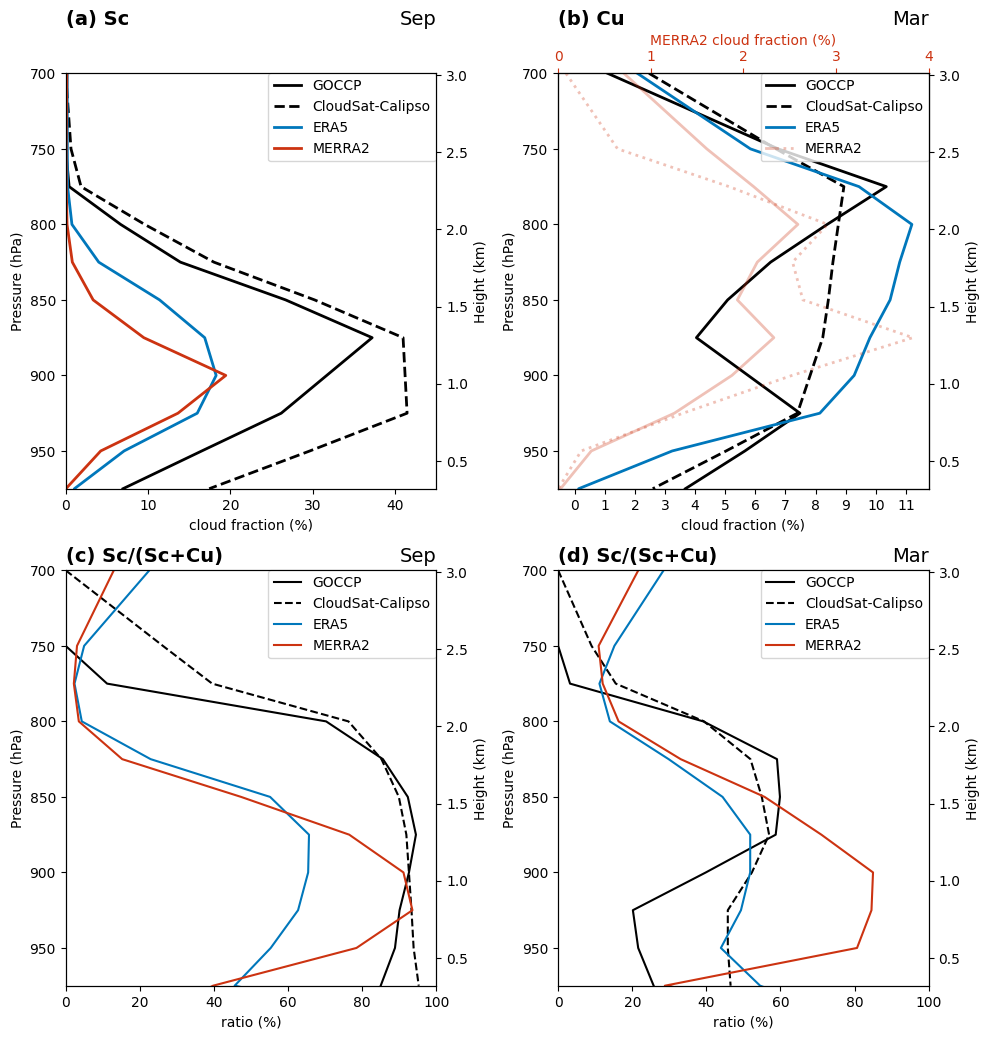

In [29]:

from matplotlib.legend_handler import HandlerTuple

npan = 4
props = dict(boxstyle='square', facecolor='white', alpha=0.8)

fig = plt.figure(figsize=(10, 20), tight_layout=True)
for j in range(0,npan,1):
    ax1 = fig.add_subplot(npan,2,j+1)
    if j == 0:
        cl_sc = 'Sc'
        twina = ax1.twinx()
        p11, = ax1.plot(gc_sc_sep*100, gc_sc_sep['level'], color="#000000",label="GOCCP", linewidth = 2)
        p22, = ax1.plot(cc_sc_sep*100, cc_sc_sep['level'],color="#000000",label="CloudSat-Calipso", linestyle = '--', linewidth = 2)
        #plt.ylabel('RA cloud fraction (%)',fontsize=10)
        p33, = ax1.plot(era_sc_sep*100, era_sc_sep['level'], color="#0077BB",label="ERA5", linewidth = 2)

        p4, = ax1.plot(merra_sc_sep*100,merra_sc_sep['level'], color="#CC3311",label="MERRA2", linewidth = 2)

        #plt.gca().invert_yaxis()
        twina.set_ylim(alt[:-1].min(), alt.max())
        twina.set_ylabel("Height (km)",fontsize = fs)
        ax1.set_xlabel("cloud fraction (%)",fontsize = fs)
        #twin1.set(xlim=(0, 20))
        ax1.set(xlim=(0,45))
        plt.xlim(0,45)
        plt.xlabel("cloud fraction (%)",fontsize = fs)
        plt.title('(a) Sc', loc='left',fontsize=14, fontweight= 'bold',pad=35)
        plt.title('Sep',fontsize=14,loc = "right",pad=35)
        ax1.set_ylim(975,700)
        ax1.set_ylabel('Pressure (hPa)',fontsize=fs)
        plt.xticks(fontsize =fs)
        plt.yticks(fontsize =fs)
        ax1.tick_params(axis='y', labelsize=fs)
        ax1.tick_params(axis='x', labelsize=fs)
        #ax1.tick_params(axis='y', labelsize=12)
        ax1.legend(handles=[p11, p22, p33,p4],fontsize=fs,
                         loc='upper right', borderaxespad=0.)


    if j == 1:
        cl_cu = 'Cu'
        twin1 = ax1.twiny()
        twin2 = ax1.twinx()
        p1, = ax1.plot(gc_cu_mar*100, gc_cu_mar['level'], color="#000000",label="GOCCP", linewidth = 2)
        p2, = ax1.plot(cc_cu_mar*100, cc_cu_mar['level'],color="#000000",label="CloudSat-Calipso", linestyle = '--', linewidth = 2)
        p3, = ax1.plot(era_cu_mar*100, era_cu_mar['level'], color="#0077BB",label="ERA5", linewidth = 2)
        p4, =  twin1.plot(merra_cu_mar*100,merra_cu_mar['level'], color="#CC3311",label="MERRA2", linewidth = 2, alpha = 0.3)
        p4a, =  twin1.plot(merra_cu_reg_mar*100,merra_cu_reg_mar['level'], color="#CC3311", linestyle = ':',linewidth = 2, alpha = 0.3)

        #handles = [(p4, p4a)]
        #labels = ['MERRA2']

# Adding the custom legend
        #ax1.legend(handles, labels, handler_map={tuple: HandlerTuple(ndivide=None)})


        twin2.set_ylim(alt[:-1].min(), alt.max())
        twin2.set_ylabel("Height (km)",fontsize = fs)
        
        twin1.set_xlim((0,4))
        twin1.set_xticks(np.arange(0,5, 1.0))
        #plt.xlim(0,14)
        ax1.set_xlabel("cloud fraction (%)",fontsize = fs)
        plt.xlabel("cloud fraction (%)",fontsize = fs)
        
        twin1.set_xlabel("MERRA2 cloud fraction (%)",fontsize = fs,color="#CC3311")
        plt.title('(b) Cu', loc='left',fontsize=14, fontweight = 'bold')
        #plt.title(' averaged between EQ - 15$^{\circ}$S, 80$^{\circ}$W-120$^{\circ}$W  ', loc='right',fontsize=12)
        plt.title(''+mon+'',fontsize=14,loc = "right")
        ax1.set_ylim(975,700)
        ax1.set_ylabel('Pressure (hPa)',fontsize=fs)
        plt.xticks(np.arange(0,12, 1.0),fontsize =fs)
        plt.yticks(fontsize =fs)
        ax1.tick_params(axis='y', labelsize=fs)
        ax1.tick_params(axis='x', labelsize=fs)
        twin1.tick_params(axis = 'x',colors="#CC3311",labelsize=fs)

        ax1.legend([p1, p2, p3,(p4, p4a)], ['GOCCP', 'CloudSat-Calipso', 'ERA5', 'MERRA2'],
               handler_map={tuple: HandlerTuple(ndivide=None)},fontsize=fs, 
                         loc='upper right', borderaxespad=0.)

    
    if j ==2:
        twina1 = ax1.twinx()
        #plt.ylabel('RA cloud fraction (%)',fontsize=10)
        p11, = ax1.plot((cc_sc_sep/(cc_sc_sep+cc_cu_sep))*100, cc_sc_sep['level'],color="#000000",label="CloudSat-Calipso", linestyle = '--')
        p11a, = ax1.plot((gc_sc_sep/(gc_sc_sep+gc_cu_sep))*100, cc_sc_sep['level'],color="#000000",label="GOCCP")
        p33, = ax1.plot((era_sc_sep/(era_sc_sep+era_cu_sep))*100, era_sc_sep['level'], color="#0077BB",label="ERA5")

        p4, = ax1.plot((merra_sc_sep/(merra_sc_sep+merra_cu_sep))*100,merra_sc_sep['level'], color="#CC3311",label="MERRA2")
        twina1.set_ylim(alt[:-1].min(), alt.max())
        twina1.set_ylabel("Height (km)",fontsize = fs)



        ax1.set(xlim=(0,100))
        plt.xlim(0,100)
        plt.xlabel("Ratio (%)",fontsize = fs)
        plt.title('(c) Sc/(Sc+Cu)', loc='left',fontsize=14, fontweight= 'bold')
        plt.title('Sep',fontsize=14,loc = "right")
        ax1.set_ylim(975,700)
        ax1.set_ylabel('Pressure (hPa)',fontsize=fs)
        plt.xticks(fontsize =fs)
        plt.yticks(fontsize =fs)
        ax1.tick_params(axis='y', labelsize=fs)
        ax1.tick_params(axis='x', labelsize=fs)
        #ax1.tick_params(axis='y', labelsize=12)
        ax1.legend(handles=[p11a, p11, p33, p4],fontsize=fs,
                         loc='upper right', borderaxespad=0.)
        ax1.set_xlabel("ratio (%)",fontsize = fs)

    if j ==3:
        twina11 = ax1.twinx()
        p1, = ax1.plot((cc_sc_mar/(cc_sc_mar+cc_cu_mar))*100, cc_sc_sep['level'],color="#000000",label="CloudSat-Calipso", linestyle = '--')
        p1a, = ax1.plot((gc_sc_mar/(gc_sc_mar+gc_cu_mar))*100, cc_sc_sep['level'],color="#000000",label="GOCCP")

        p2, = ax1.plot((era_sc_mar/(era_sc_mar+era_cu_mar))*100, era_cu_sep['level'], color="#0077BB",label="ERA5")
 
        p4, =  ax1.plot((merra_sc_mar/(merra_sc_mar+merra_cu_mar))*100,merra_cu_sep['level'],color="#CC3311",label="MERRA2")
        twina11.set_ylim(alt[:-1].min(), alt.max())
        twina11.set_ylabel("Height (km)",fontsize = fs)



        ax1.set(xlim=(0,100))
        plt.xlim(0,100)
        plt.xlabel("Ratio (%)",fontsize = fs)
        plt.title('(d) Sc/(Sc+Cu)', loc='left',fontsize=14, fontweight= 'bold')
        plt.title('Mar',fontsize=14,loc = "right")
        ax1.set_ylim(975,700)
        ax1.set_ylabel('Pressure (hPa)',fontsize=fs)
        plt.xticks(fontsize =fs)
        plt.yticks(fontsize =fs)
        ax1.tick_params(axis='y', labelsize=fs)
        ax1.tick_params(axis='x', labelsize=fs)
        #ax1.tick_params(axis='y', labelsize=12)
        ax1.legend(handles=[p1a,p11, p33, p4],fontsize=fs,
                         loc='upper right', borderaxespad=0.)
        ax1.set_xlabel("ratio (%)",fontsize = fs)


plt.savefig(figfolder+'ERA5_MERRA2_normalized_ctp_sc_cu_bias_vplot_'+str(yr0)+'-'+str(yrf)+'.pdf' ,bbox_inches="tight",transparent=False)            